In [1]:
import os
import csv
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''CREATE TABLE IF NOT EXISTS numerical_data (
                    id INTEGER PRIMARY KEY,
                    age INTEGER,
                    bmi REAL,
                    children INTEGER,
                    charges REAL
                )''')

cursor.execute('''CREATE TABLE IF NOT EXISTS categorical_data (
                    id INTEGER PRIMARY KEY,
                    sex TEXT,
                    smoker TEXT,
                    region TEXT
                )''')

# Read data from CSV and insert into tables
with open('medical insurance expensess-Copy1.csv', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Insert into numerical_data table
        numerical_data = (row['age'], row['bmi'], row['children'], row['charges'])
        cursor.execute('''INSERT INTO numerical_data (age, bmi, children, charges) VALUES (?, ?, ?, ?)''', numerical_data)
        numerical_id = cursor.lastrowid
        
        # Insert into categorical_data table
        categorical_data = (row['sex'], row['smoker'], row['region'])
        cursor.execute('''INSERT INTO categorical_data (sex, smoker, region) VALUES (?, ?, ?)''', categorical_data)
        categorical_id = cursor.lastrowid
        
        # Update numerical_data table with categorical_id
        cursor.execute('''UPDATE numerical_data SET id = ? WHERE rowid = ?''', (categorical_id, numerical_id))

# Commit changes and close connection
conn.commit()
conn.close()

In [2]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')
cursor = conn.cursor()

# Retrieve and print numerical data
print("Numerical Data:")
cursor.execute('''SELECT * FROM numerical_data''')
numerical_data = cursor.fetchall()
for row in numerical_data:
    print(row)

# Retrieve and print categorical data
print("\nCategorical Data:")
cursor.execute('''SELECT * FROM categorical_data''')
categorical_data = cursor.fetchall()
for row in categorical_data:
    print(row)

# Close connection
conn.close()

Numerical Data:
(1, 19, 27.9, 0, 16884.924)
(2, 18, 33.77, 1, 1725.5523)
(3, 28, 33.0, 3, 4449.462)
(4, 33, 22.705, 0, 21984.47061)
(5, 32, 28.88, 0, 3866.8552)
(6, 31, 25.74, 0, 3756.6216)
(7, 46, 33.44, 1, 8240.5896)
(8, 37, 27.74, 3, 7281.5056)
(9, 37, 29.83, 2, 6406.4107)
(10, 60, 25.84, 0, 28923.13692)
(11, 25, 26.22, 0, 2721.3208)
(12, 62, 26.29, 0, 27808.7251)
(13, 23, 34.4, 0, 1826.843)
(14, 56, 39.82, 0, 11090.7178)
(15, 27, 42.13, 'None', 39611.7577)
(16, 19, 24.6, 1, 1837.237)
(17, 52, 30.78, 1, 10797.3362)
(18, 23, 23.845, 0, 2395.17155)
(19, 56, 40.3, 0, 10602.385)
(20, 30, 'None', 0, 36837.467)
(21, 60, 36.005, 0, 13228.84695)
(22, 30, 32.4, 1, 4149.736)
(23, 18, 34.1, 0, 1137.011)
(24, 34, 31.92, 1, 37701.8768)
(25, 37, 28.025, 2, 6203.90175)
(26, 59, 27.72, 3, 14001.1338)
(27, 63, 23.085, 0, 14451.83515)
(28, 55, 32.775, 2, 12268.63225)
(29, 23, 17.385, 1, 2775.19215)
(30, 31, 36.3, 2, 38711.0)
(31, 22, 35.6, 0, 35585.576)
(32, 18, 26.315, 0, 2198.18985)
(33, 19, 28.6, 

In [3]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')

# SQL query with JOIN
query = """ SELECT numerical_data.id,numerical_data.age,numerical_data.bmi,numerical_data.children,
                   categorical_data.sex,categorical_data.region,categorical_data.smoker,numerical_data.charges
            FROM numerical_data
            JOIN categorical_data ON categorical_data.id = numerical_data.id;
        """

# Fetch data into Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display DataFrame
print(df)

        id age     bmi children     sex     region smoker      charges
0        1  19    27.9        0  female  southwest    yes    16884.924
1        2  18   33.77        1    male  southeast     no    1725.5523
2        3  28    33.0        3    male  southeast     no     4449.462
3        4  33  22.705        0    male  northwest     no  21984.47061
4        5  32   28.88        0    male  northwest     no    3866.8552
...    ...  ..     ...      ...     ...        ...    ...          ...
4009  4010  50   30.97        3    male  northwest     no   10600.5483
4010  4011  18   31.92        0  female  northeast     no    2205.9808
4011  4012  18   36.85        0  female  southeast     no    1629.8335
4012  4013  21    25.8        0  female  southwest     no     2007.945
4013  4014  61   29.07        0  female  northwest    yes   29141.3603

[4014 rows x 8 columns]


In [4]:
df.dtypes

id           int64
age         object
bmi         object
children    object
sex         object
region      object
smoker      object
charges     object
dtype: object

In [5]:
df.describe()

,id
count,4014.000000
mean,2007.500000
std,1158.886319
min,1.000000
25%,1004.250000
50%,2007.500000
75%,3010.750000
max,4014.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4014 non-null   int64 
 1   age       4014 non-null   object
 2   bmi       4014 non-null   object
 3   children  4014 non-null   object
 4   sex       4014 non-null   object
 5   region    4014 non-null   object
 6   smoker    4014 non-null   object
 7   charges   4014 non-null   object
dtypes: int64(1), object(7)
memory usage: 251.0+ KB


In [7]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Replace NaN values in 'age' column with the median
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

# Convert 'children' column to numeric with errors set to 'coerce'
df['children'] = pd.to_numeric(df['children'], errors='coerce')
median_children = df['children'].median()
df['children'].fillna(median_children, inplace=True)

# Replace NaN values in 'children' column with 0
#df['children'].fillna(0, inplace=True)

# Convert 'bmi' column to numeric with errors set to 'coerce'
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# Replace NaN values in 'bmi' column with the median
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

# Convert 'charges' column to numeric with errors set to 'coerce'
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

# Replace NaN values in 'charges' column with the mean
mean_charges = df['charges'].mean()
df['charges'].fillna(mean_charges, inplace=True)

C:\Users\Manasa Reddy\AppData\Local\Temp\ipykernel_21956\2919548291.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)
C:\Users\Manasa Reddy\AppData\Local\Temp\ipykernel_21956\2919548291.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [8]:
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
train, test = train_test_split(df, test_size=0.3, stratify=df['sex'], random_state=20240417)

In [9]:
train['sex'].value_counts() / len(train['sex'])
test['sex'].value_counts() / len(test['sex'])

sex
male      0.505162
female    0.494838
Name: count, dtype: float64

sex
male      0.505394
female    0.494606
Name: count, dtype: float64

In [10]:
train.head()

,id,age,bmi,children,sex,region,smoker,charges
2100,2101,33.0,27.10,1.0,male,southwest,yes,19040.8760
776,777,40.0,32.30,2.0,male,northwest,no,6986.6970
3027,3028,50.0,25.60,0.0,female,southwest,no,8932.0840
3020,3021,49.0,41.47,4.0,female,southeast,no,10977.2063
3111,3112,60.0,33.11,3.0,male,southeast,no,13919.8229


In [11]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
print(categorical_columns)
print(numerical_columns)

Index(['sex', 'region', 'smoker'], dtype='object')
Index(['id', 'age', 'bmi', 'children', 'charges'], dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4014 non-null   int64  
 1   age       4014 non-null   float64
 2   bmi       4014 non-null   float64
 3   children  4014 non-null   float64
 4   sex       4014 non-null   object 
 5   region    4014 non-null   object 
 6   smoker    4014 non-null   object 
 7   charges   4014 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 251.0+ KB


In [13]:
!pip install ydata-profiling

In [14]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
trains=train
trains['smoker'] = trains['smoker'].replace({'no': 0, 'yes': 1})
numerical_columns = trains.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = trains.select_dtypes(include=['object', 'category']).columns

C:\Users\Manasa Reddy\AppData\Local\Temp\ipykernel_21956\332877866.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trains['smoker'] = trains['smoker'].replace({'no': 0, 'yes': 1})


In [16]:
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df_cleaned.sample(5)

C:\Users\Manasa Reddy\AppData\Local\Temp\ipykernel_21956\2596724218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])


,id,age,bmi,children,sex,region,smoker,charges,age_group
236,237,18.0,26.73,0.0,female,southeast,no,1615.7667,Young
3517,3518,59.0,24.70,0.0,male,northeast,no,12323.9360,Middle-aged
836,837,36.0,31.50,0.0,male,southwest,no,4402.2330,Adult
3693,3694,26.0,34.20,2.0,female,southwest,no,3987.9260,Adult
2060,2061,62.0,37.40,0.0,male,southwest,no,12979.3580,Senior


In [17]:
corr_matrix = trains.corr(numeric_only=True)
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.795854
age         0.298550
bmi         0.192203
children    0.068902
id         -0.013468
Name: charges, dtype: float64

Text(0.5, 1.0, 'Correlation Plot')

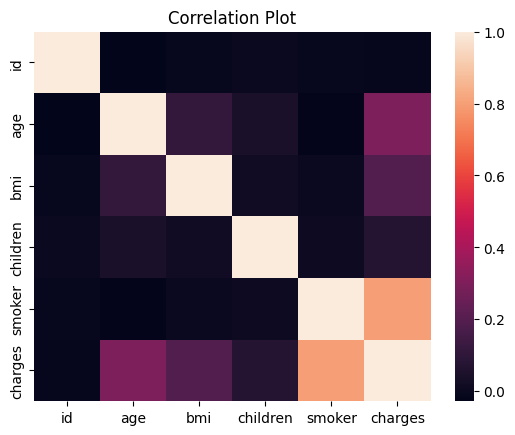

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.heatmap(trains.select_dtypes(exclude='object').corr()).set_title('Correlation Plot')
plt.show()

In [19]:
correlation_matrix = trains.select_dtypes(exclude='object').corr()
print(correlation_matrix)

                id       age       bmi  children    smoker   charges
id        1.000000 -0.028067 -0.010451  0.000286 -0.010583 -0.013468
age      -0.028067  1.000000  0.108656  0.042206 -0.023786  0.298550
bmi      -0.010451  0.108656  1.000000  0.020122 -0.000770  0.192203
children  0.000286  0.042206  0.020122  1.000000  0.005926  0.068902
smoker   -0.010583 -0.023786 -0.000770  0.005926  1.000000  0.795854
charges  -0.013468  0.298550  0.192203  0.068902  0.795854  1.000000


- Analysis of Correlation plot
- *Charges and Smoker
    - There is a strong positive correlation (0.784) between charges and smoker status
    - This suggests that individuals who smoke tend to have higher medical charges compared to non-smokers
- *Charges and Age
    - There is a moderate positive correlation (0.287) between charges and age
    - This indicates that as individuals get older their medical charges tend to increase
- *Charges and BMI
    - There is a weak positive correlation (0.193) between charges and BMI (Body Mass Index)
    - This suggests that individuals with higher BMI may have slightly higher medical charges
- *Charges and Children
    - There is a very weak positive correlation (0.074) between charges and the number of children
    - This indicates that there is a slight tendency for individuals with more children to have slightly higher medical charges
    
- Overall, the strongest correlation is observed between charges and smoker status, suggesting that smoking behavior has a significant impact on medical charges making it a strong predictor. Age also shows a moderate positive correlation with charges, indicating that age plays a role in determining medical expenses. However, BMI and the number of children have weaker correlations with charges compared to smoker status and age.

Text(0.5, 1.0, 'Analysis of medical insurance plans based on smoker')

<Axes: title={'center': 'Analysis of medical insurance plans based on smoker'}, xlabel='smoker', ylabel='charges'>

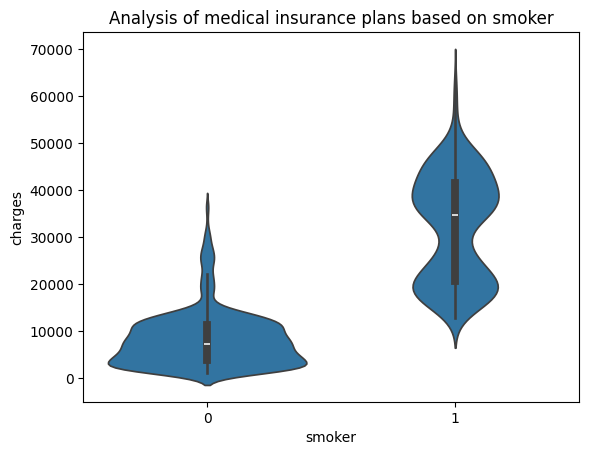

In [20]:
plt.title('Analysis of medical insurance plans based on smoker')
sns.violinplot(x='smoker', y='charges', data=trains)
plt.show()

*Analysis of medical insurance plans based on smoker
   - The obtained violin plot displays the distribution of medical insurance plans based on smoker status
   - There are more plans available for non-smokers, as shown by the wider violin on the left
   - Smokers face higher median insurance prices, as indicated by the higher horizontal line in the right violin
   - The price distribution is broader for smokers, suggesting greater variation in plans compared to non-smokers
   - The plot provides an overview of trends, it does not establish causality between smoking and insurance prices

Text(0.5, 1.0, 'Analysis of medical insurance plans based on sex')

<Axes: title={'center': 'Analysis of medical insurance plans based on sex'}, xlabel='sex', ylabel='charges'>

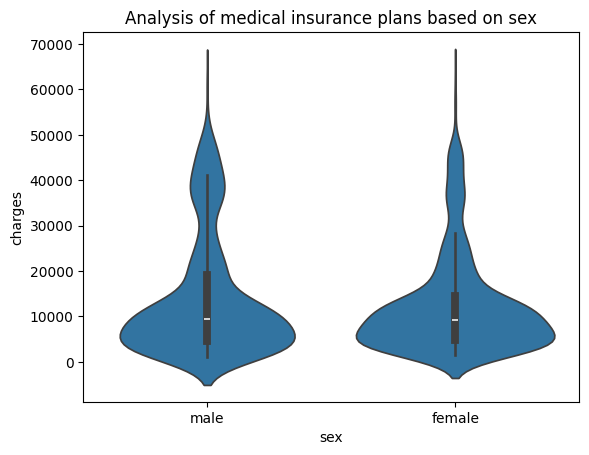

In [21]:
plt.title('Analysis of medical insurance plans based on sex')
sns.violinplot(x='sex', y='charges', data=trains)
plt.show()

*Analysis of medical insurance plans based on sex
   - The distribution of charges is wider for females than for males
   - A wider spread of the violin on the left side of the plot compared to the violin on the right side is observed
   - This suggests that there is more variation in the charges for medical insurance plans for females than for males
   - The median charge of medical insurance plans is higher for females than for males
   - This is shown by the fact that the horizontal line in the violin on the left is higher than the horizontal line in the violin on the right

Text(0.5, 1.0, 'Analysis of medical insurance plans based on region')

<Axes: title={'center': 'Analysis of medical insurance plans based on region'}, xlabel='region', ylabel='charges'>

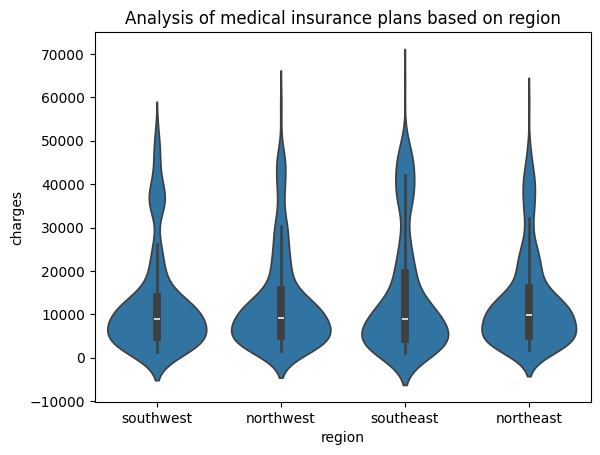

In [22]:
plt.title('Analysis of medical insurance plans based on region')
sns.violinplot(x='region', y='charges', data=trains)
plt.show()

*Analysis of medical insurance plans based on region
   - The violin plot illustrates the distribution of changes in medical insurance plans by region (northeast, southeast, northwest, southwest)
   - All regions exhibit almost a similar distribution, as indicated by the consistent width and spread across the violins
   - The northeast and southwest regions demonstrate a wider range of changes, as evidenced by the extended tails
   - In contrast, the southeast and northwest regions have a more confined range
   - The median change in plots is positive across all regions, with horizontal lines situated above zero 
   - This plot provides a visual overview of data trends, it doesn't convey specific changes in plan numbers

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    numerical_columns = [
        'bmi', 
        'age',
        'children',
    ]
    categorical_columns = [
        'region',
        'sex',
        'smoker'
    ]
    
    def fit(self, X, y=None): 
        # Verify if 'charges' column exists in X

        # Create and fit simple imputer for numerical columns
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])

        # Create and fit Standard Scaler for numerical columns
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns]) 
        
        # Create and fit one hot encoder for categorical columns
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[self.categorical_columns])

        return self 



    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.categorical_columns])
        
        # Copy the df 
        transformed_df = X.copy()
         
        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])        
        
        # Drop existing categorical columns and replace with one hot equivalent
        transformed_df = transformed_df.drop(self.categorical_columns, axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [24]:
preprocessor = Preprocessor()
preprocessor.fit(df)
train_fixed = preprocessor.transform(df)

Preprocessor()

In [25]:
train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4014 non-null   int64  
 1   age               4014 non-null   float64
 2   bmi               4014 non-null   float64
 3   children          4014 non-null   float64
 4   charges           4014 non-null   float64
 5   region_northeast  4014 non-null   int32  
 6   region_northwest  4014 non-null   int32  
 7   region_southeast  4014 non-null   int32  
 8   region_southwest  4014 non-null   int32  
 9   sex_female        4014 non-null   int32  
 10  sex_male          4014 non-null   int32  
 11  smoker_no         4014 non-null   int32  
 12  smoker_yes        4014 non-null   int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 282.4 KB


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(Preprocessor(), RandomForestRegressor(n_estimators=50))

In [27]:
rfr

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [28]:
y_train = train['charges']
x_train=train.drop('charges', axis=1)
x_test = test.drop('charges', axis=1)
y_test = test['charges']
#x_train = train.iloc[:, list(range(0, 3)) + list(range(4,7))]
rfr.fit(x_train, y_train)

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = rfr.predict(x_test)
# Calculate and log metrics
mse = mean_squared_error (y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root mean square error",rmse)
print("Mean absolute error",mae)
print("Mean squared error",mse)

Root mean square error 21832.1820173169
Mean absolute error 18142.414724592836
Mean squared error 21832.1820173169


C:\Users\Manasa Reddy\anaconda3\envs\mlpipeline\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
params = rfr.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor(n_estimators=50))],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(n_estimators=50),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__monotonic_cst': None,
 'randomforestregressor__n_estimators': 50,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'r

In [31]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8090")

# Create a new MLflow Experiment
mlflow.set_experiment("Predict medical insurance charges")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rmse)
    mlflow.log_metric("mean_absolute_error", mae)
    mlflow.log_metric("mean_squared_error", mse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RandomForestRegressor model for medical insurance data, n_estimators=50")

    # Infer the model signature
    signature = infer_signature(x_train, rfr.predict(x_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rfr,
        artifact_path="Predicting Medical Insurance Charges",
        signature=signature,
        #input_example=preprocessor.transform(X_train),
        registered_model_name="rfr_moodel",
    )

<Experiment: artifact_location='mlflow-artifacts:/184591417651165821', creation_time=1715905245913, experiment_id='184591417651165821', last_update_time=1715905245913, lifecycle_stage='active', name='Predict medical insurance charges', tags={}>

2024/05/16 21:29:05 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

C:\Users\Manasa Reddy\anaconda3\envs\mlpipeline\Lib\site-packages\mlflow\types\utils.py:394: UserWarning

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Assuming Preprocessor() is defined elsewhere
linear_regression_model = make_pipeline(Preprocessor(), LinearRegression(fit_intercept=True))

In [33]:
linear_regression_model

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('linearregression', LinearRegression())])

In [34]:
params = linear_regression_model.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'linearregression': LinearRegression(),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__positive': False}

In [35]:
linear_regression_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('linearregression', LinearRegression())])

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
   
y_pred = linear_regression_model.predict(x_test)
# Calculate and log metrics
mse = mean_squared_error (y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root mean square error",rmse)
print("Mean absolute error",mae)
print("Mean squared error",mse)

Root mean square error 13238.235247087876
Mean absolute error 12192.365488383235
Mean squared error 13238.235247087876


C:\Users\Manasa Reddy\anaconda3\envs\mlpipeline\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
params = linear_regression_model.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'linearregression': LinearRegression(),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__positive': False}

In [38]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8090")

# Create a new MLflow Experiment
mlflow.set_experiment("Predict medical insurance charges")


# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rmse)
    mlflow.log_metric("mean_absolute_error", mae)
    mlflow.log_metric("mean_squared_error", mse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Linear regression model for medical insurance data, n-intercepts")

    # Infer the model signature
    signature = infer_signature(x_train, linear_regression_model.predict(x_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=linear_regression_model,
        artifact_path="Predicting Medical Insurance Charges",
        signature=signature,
        #input_example=preprocessor.transform(X_train),
        registered_model_name="linear_regression_moodel",
    )

<Experiment: artifact_location='mlflow-artifacts:/184591417651165821', creation_time=1715905245913, experiment_id='184591417651165821', last_update_time=1715905245913, lifecycle_stage='active', name='Predict medical insurance charges', tags={}>

C:\Users\Manasa Reddy\anaconda3\envs\mlpipeline\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
C:\Users\Manasa Reddy\anaconda3\envs\mlpipeline\Lib\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

# Assuming Preprocessor() is defined elsewhere
svr_model = make_pipeline(Preprocessor(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

In [40]:

svr_model

Pipeline(steps=[('preprocessor', Preprocessor()), ('svr', SVR())])

In [41]:

svr_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor', Preprocessor()), ('svr', SVR())])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = svr_model.predict(x_test)
# Calculate and log metrics
mse = mean_squared_error (y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root mean square error",rmse)
print("Mean absolute error",mae)
print("Mean squared error",mse)

Root mean square error 12437.416895781951
Mean absolute error 8132.803152913548
Mean squared error 12437.416895781951


C:\Users\Manasa Reddy\anaconda3\envs\mlpipeline\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
params = svr_model.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()), ('svr', SVR())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'svr': SVR(),
 'svr__C': 1.0,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 3,
 'svr__epsilon': 0.1,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

In [44]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8090")

# Create a new MLflow Experiment
mlflow.set_experiment("Predict medical insurance charges")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rmse)
    mlflow.log_metric("mean_absolute_error", mae)
    mlflow.log_metric("mean_squared_error", mse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "SVR model for medical insurance data, n_epsilon")

    # Infer the model signature
    signature = infer_signature(x_train, svr_model.predict(x_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=svr_model,
        artifact_path="Predicting Medical Insurance Charges",
        signature=signature,
        #input_example=preprocessor.transform(X_train),
        registered_model_name="svr_moodel",
    )

<Experiment: artifact_location='mlflow-artifacts:/184591417651165821', creation_time=1715905245913, experiment_id='184591417651165821', last_update_time=1715905245913, lifecycle_stage='active', name='Predict medical insurance charges', tags={}>

C:\Users\Manasa Reddy\anaconda3\envs\mlpipeline\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
C:\Users\Manasa Reddy\anaconda3\envs\mlpipeline\Lib\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys